In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Fetch the data and load it in pandas

In [2]:
import os
from urllib.request import urlretrieve

url = ("https://archive.ics.uci.edu/ml/machine-learning-databases"
       "/adult/adult.data")
local_filename = os.path.basename(url)
if not os.path.exists(local_filename):
    print("Downloading Adult Census datasets from UCI")
    urlretrieve(url, local_filename)

In [3]:
names = ("age, workclass, fnlwgt, education, education-num, "
         "marital-status, occupation, relationship, race, sex, "
         "capital-gain, capital-loss, hours-per-week, "
         "native-country, income").split(', ')    
data = pd.read_csv(local_filename, names=names)

In [4]:
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


`fnlwgt` stands for "final weight". This is used by the Census Bureau to create "weighted tallies" of any specified socio-economic characteristics of the population. People with similar demographic characteristics should have similar weights. In this tutorial we will ignore the existence of column as I am not a Census expert and don't know how to properly use that information. Instead we will assume that the raw records are a direct and representative subsample of the population.

In [5]:
data = data.drop('fnlwgt', axis=1)

In [6]:
data.count()

age               32561
workclass         32561
education         32561
education-num     32561
marital-status    32561
occupation        32561
relationship      32561
race              32561
sex               32561
capital-gain      32561
capital-loss      32561
hours-per-week    32561
native-country    32561
income            32561
dtype: int64

In [7]:
data.describe()

,age,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,10.080679,1077.648844,87.303830,40.437456
std,13.640433,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,48.000000,12.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


In [8]:
data.groupby('occupation').size().nlargest(10)

occupation
 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3770
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
dtype: int64

In [9]:
(data.groupby('occupation')
    .apply(lambda g: np.mean(g['income'] == ' >50K'))
    .sort_values())

occupation
 Priv-house-serv      0.006711
 Other-service        0.041578
 Handlers-cleaners    0.062774
 ?                    0.103635
 Armed-Forces         0.111111
 Farming-fishing      0.115694
 Machine-op-inspct    0.124875
 Adm-clerical         0.134483
 Transport-moving     0.200376
 Craft-repair         0.226641
 Sales                0.269315
 Tech-support         0.304957
 Protective-serv      0.325116
 Prof-specialty       0.449034
 Exec-managerial      0.484014
dtype: float64

In [10]:
data.groupby('native-country').size().nlargest(10)

native-country
 United-States    29170
 Mexico             643
 ?                  583
 Philippines        198
 Germany            137
 Canada             121
 Puerto-Rico        114
 El-Salvador        106
 India              100
 Cuba                95
dtype: int64

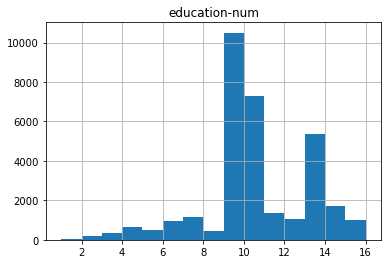

In [11]:
data.hist(column='education-num', bins=15);

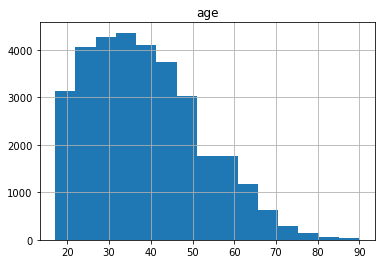

In [12]:
data.hist(column='age', bins=15);

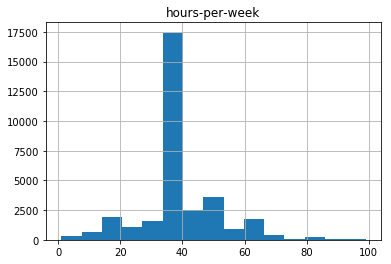

In [13]:
data.hist('hours-per-week', bins=15);

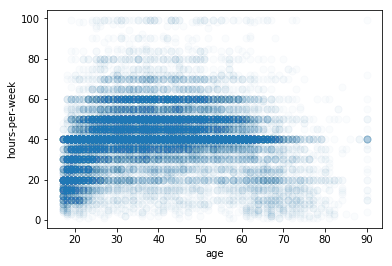

In [14]:
data.plot(x='age', y='hours-per-week', kind='scatter',
          alpha=0.02, s=50);

In [15]:
data.groupby('income')['income'].count()

income
 <=50K    24720
 >50K      7841
Name: income, dtype: int64

In [16]:
np.mean(data['income'] == ' >50K')

0.24080955744602439

In [17]:
target_names = data['income'].unique()
target_names

array([' <=50K', ' >50K'], dtype=object)

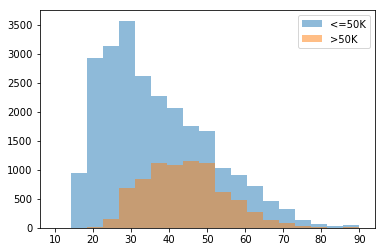

In [18]:
low_income = data[data['income'] == ' <=50K']
high_income = data[data['income'] == ' >50K']

bins = np.linspace(10, 90, 20)
plt.hist(low_income['age'].values, bins=bins, alpha=0.5, label='<=50K')
plt.hist(high_income['age'].values, bins=bins, alpha=0.5, label='>50K')
plt.legend(loc='best');

**Exercise**:

- Make a 2D scatter plot of "age" vs "hours-per-week" for each income group overlapping in the same figure.

- What conclusions can you draw on on the high income group?

- Is it possible to only use the "age" and "hours-per-week" attributes to separate the two income groups? 

In [ ]:
# %load solutions/01_scatter_plot_income_groups.py

## Building predictive models

In [24]:
target = data['income']
features_data = data.drop('income', axis=1)

In [25]:
numeric_features = [column_name for column_name in features_data
                    if features_data[column_name].dtype.kind in ('i', 'f')]
numeric_features

['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']

In [26]:
numeric_data = features_data[numeric_features]
numeric_data.head(5)

,age,education-num,capital-gain,capital-loss,hours-per-week
0,39,13,2174,0,40
1,50,13,0,0,13
2,38,9,0,0,40
3,53,7,0,0,40
4,28,13,0,0,40


In [27]:
categorical_data = features_data.drop(numeric_features, 1)
categorical_data.head(5)

,workclass,education,marital-status,occupation,relationship,race,sex,native-country
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba


In [28]:
categorical_data.describe()

,workclass,education,marital-status,occupation,relationship,race,sex,native-country
count,32561,32561,32561,32561,32561,32561,32561,32561
unique,9,16,7,15,6,5,2,42
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States
freq,22696,10501,14976,4140,13193,27816,21790,29170


In [29]:
categorical_data_encoded = categorical_data.apply(lambda x: pd.factorize(x)[0])
categorical_data_encoded.head(5)

,workclass,education,marital-status,occupation,relationship,race,sex,native-country
0,0,0,0,0,0,0,0,0
1,1,0,1,1,1,0,0,0
2,2,1,2,2,0,0,0,0
3,2,2,1,2,1,1,0,0
4,2,0,1,3,2,1,1,1


In [68]:
features = pd.concat([numeric_data, categorical_data_encoded], axis=1)
features.head()

,age,education-num,capital-gain,capital-loss,hours-per-week,workclass,education,marital-status,occupation,relationship,race,sex,native-country
0,39,13,2174,0,40,0,0,0,0,0,0,0,0
1,50,13,0,0,13,1,0,1,1,1,0,0,0
2,38,9,0,0,40,2,1,2,2,0,0,0,0
3,53,7,0,0,40,2,2,1,2,1,1,0,0
4,28,13,0,0,40,2,0,1,3,2,1,1,1


In [69]:
# Alternatively: use one-hot encoding for categorical features
# features = pd.get_dummies(features_data)
# features.head()

In [70]:
X = features.values.astype(np.float32)
y = (target.values == ' >50K').astype(np.int32)

In [71]:
X.shape

(32561, 13)

In [72]:
y

array([0, 0, 0, ..., 0, 0, 1], dtype=int32)

In [73]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0)

In [74]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(max_depth=8)
clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=8,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [75]:
y_pred = clf.predict(X_test)
y_pred.shape

(6513,)

In [76]:
y_pred[:5]

array([0, 0, 0, 1, 1], dtype=int32)

In [83]:
y_test[:5]

array([0, 0, 0, 0, 1], dtype=int32)

**Exercise**

Compute the accuracy of the model on the test set: the average number of times the model predictions in `y_pred` match the true labels in `y_test`.

## Alternative performance metrics

In [77]:
predictions = clf.predict_proba(X_test)

In [78]:
predictions.shape

(6513, 2)

In [79]:
predictions[:5]

array([[ 0.94698795,  0.05301205],
       [ 0.98780488,  0.01219512],
       [ 0.89754098,  0.10245902],
       [ 0.        ,  1.        ],
       [ 0.        ,  1.        ]])

In [80]:
from sklearn.metrics import roc_auc_score

y_pred_proba = clf.predict_proba(X_test)[:, 1]
print("ROC AUC: %0.4f" % roc_auc_score(y_test, y_pred_proba))

ROC AUC: 0.8995


## Cross-validation

In [81]:
from sklearn.model_selection import cross_val_score

clf = DecisionTreeClassifier(max_depth=8)

scores = cross_val_score(clf, X_train, y_train, cv=5, scoring='roc_auc')
print("ROC AUC on each CV fold:", scores)
print("ROC AUC Decision Tree: {:.4f} +/-{:.4f}".format(
    np.mean(scores), np.std(scores)))

ROC AUC on each CV fold: [ 0.90391366  0.89882186  0.89631554  0.8979799   0.89394374]
ROC AUC Decision Tree: 0.8982 +/-0.0033


In [82]:
from sklearn.model_selection import cross_validate

clf = DecisionTreeClassifier(max_depth=8)

results = cross_validate(clf, X_train, y_train, cv=5, scoring='roc_auc',
                         return_train_score=True)
print("ROC AUC Decision Tree (on validation folds): {:.4f} +/-{:.4f}".format(
    np.mean(results['test_score']), np.std(scores)))
print("ROC AUC Decision Tree (on train folds): {:.4f} +/-{:.4f}".format(
    np.mean(results['train_score']), np.std(results['train_score'])))

ROC AUC Decision Tree (on validation folds): 0.8979 +/-0.0033
ROC AUC Decision Tree (on train folds): 0.9129 +/-0.0005


**Exercise**:

- Try differents values of `max_depth` such as: `1`, `2`, `5`, `None`
- Can you suggest an explanation for the impact of `max_depth` on the cross-validate score?

## Impact of the max_depth parameter

In [84]:
from sklearn.model_selection import validation_curve


def plot_validation_curve(estimator, X, y, param_name, param_range,
                          ylim=(0, 1.1), cv=5, n_jobs=-1, scoring=None):
    estimator_name = type(estimator).__name__
    plt.title("Validation curves for %s on %s"
              % (param_name, estimator_name))
    plt.ylim(*ylim); plt.grid()
    plt.xlim(min(param_range), max(param_range))
    plt.xlabel(param_name)
    plt.ylabel("Score")

    train_scores, test_scores = validation_curve(
        estimator, X, y, param_name, param_range,
        cv=cv, n_jobs=n_jobs, scoring=scoring)

    train_scores_mean = np.mean(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    plt.semilogx(param_range, train_scores_mean, 'o-', color="r",
                 label="Training score")
    plt.semilogx(param_range, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
    plt.legend(loc="best")
    print("Best test score: {:.4f}".format(test_scores_mean[-1]))

Best test score: 0.7657


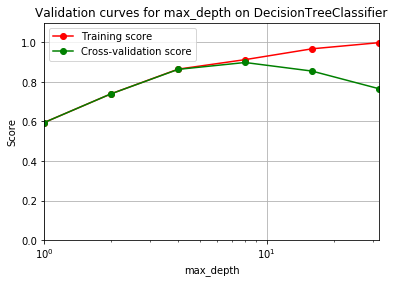

In [85]:
clf = DecisionTreeClassifier(max_depth=8)
param_name = 'max_depth'
param_range = [1, 2, 4, 8, 16, 32]

plot_validation_curve(clf, X_train, y_train,
                      param_name, param_range, scoring='roc_auc')

## Impact of the training set size

In [86]:
from sklearn.model_selection import learning_curve


def plot_learning_curve(estimator, X, y, ylim=(0, 1.1), cv=5,
                        n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5),
                        scoring=None):
    plt.title("Learning curves for %s" % type(estimator).__name__)
    plt.ylim(*ylim); plt.grid()
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, validation_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes,
        scoring=scoring)
    train_scores_mean = np.mean(train_scores, axis=1)
    validation_scores_mean = np.mean(validation_scores, axis=1)

    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, validation_scores_mean, 'o-', color="g",
             label="Cross-validation score")
    plt.legend(loc="best")
    print("Best validation score: {:.4f}".format(validation_scores_mean[-1]))

Best validation score: 0.7623


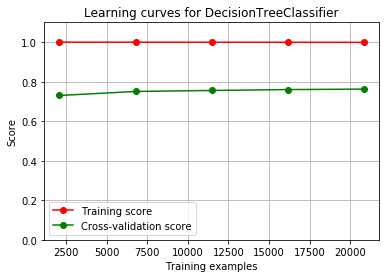

In [87]:
clf = DecisionTreeClassifier(max_depth=None)
plot_learning_curve(clf, X_train, y_train, scoring='roc_auc')

Best validation score: 0.8629


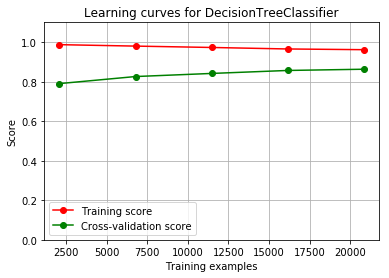

In [88]:
clf = DecisionTreeClassifier(max_depth=15)
plot_learning_curve(clf, X_train, y_train, scoring='roc_auc')

Best validation score: 0.8980


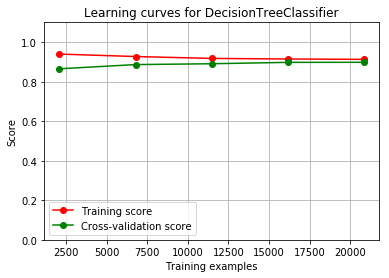

In [89]:
clf = DecisionTreeClassifier(max_depth=8)
plot_learning_curve(clf, X_train, y_train, scoring='roc_auc')

Best validation score: 0.8636


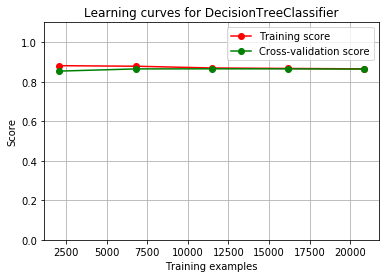

In [90]:
clf = DecisionTreeClassifier(max_depth=4)
plot_learning_curve(clf, X_train, y_train, scoring='roc_auc')

## Gradient Boosted Decision Trees

In [91]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=30, max_features=10,
                             max_depth=10)

scores = cross_val_score(clf, X_train, y_train, cv=5, scoring='roc_auc',
                         n_jobs=-1)
print("ROC Random Forest: {:.4f} +/-{:.4f}".format(
    np.mean(scores), np.std(scores)))

ROC Random Forest: 0.9144 +/-0.0026


In [92]:
from sklearn.ensemble import GradientBoostingClassifier

clf = GradientBoostingClassifier(max_leaf_nodes=5, learning_rate=0.1,
                                 n_estimators=100)

scores = cross_val_score(clf, X_train, y_train, cv=5, scoring='roc_auc',
                         n_jobs=-1)
print("ROC AUC Gradient Boosted Trees: {:.4f} +/-{:.4f}".format(
    np.mean(scores), np.std(scores)))

ROC AUC Gradient Boosted Trees: 0.9184 +/-0.0030


## Evaluation of the best model

In [93]:
%%time
_ = clf.fit(X_train, y_train)

CPU times: user 1.89 s, sys: 28.4 ms, total: 1.92 s
Wall time: 1.94 s


In [94]:
from sklearn.metrics import roc_auc_score

y_pred_proba = clf.predict_proba(X_test)[:, 1]
print("ROC AUC: %0.4f" % roc_auc_score(y_test, y_pred_proba))

ROC AUC: 0.9170


In [95]:
from sklearn.metrics import classification_report

y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred, target_names=target_names))

             precision    recall  f1-score   support

      <=50K       0.88      0.95      0.91      4918
       >50K       0.78      0.59      0.67      1595

avg / total       0.85      0.86      0.85      6513



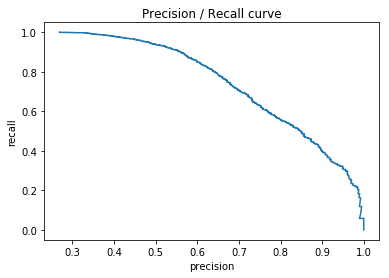

In [96]:
from sklearn.metrics import precision_recall_curve

precision_gb, recall_gb, thresholds = precision_recall_curve(y_test, y_pred_proba)

plt.plot(precision_gb, recall_gb)
plt.xlabel('precision')
plt.ylabel('recall')
plt.title('Precision / Recall curve');

In [97]:
print(thresholds[::100])

[ 0.01058433  0.01257338  0.01511583  0.01718492  0.01956557  0.02188993
  0.02414008  0.02685582  0.02914586  0.03181673  0.03466892  0.03783682
  0.04079479  0.04434868  0.04797278  0.05277058  0.05863796  0.0635903
  0.06960205  0.07592783  0.08358327  0.09314288  0.10281329  0.11367267
  0.12425691  0.13802176  0.15011747  0.1664387   0.18346445  0.2057071
  0.22697712  0.24803614  0.27444622  0.29946659  0.32396462  0.3538863
  0.39054441  0.42409307  0.46744608  0.5145512   0.56691139  0.62866325
  0.68186005  0.74242828  0.81128931  0.8854831   0.95372367  0.97320049
  0.98443587]


## Variable importances

In [98]:
clf.feature_importances_

array([ 0.1359729 ,  0.12242704,  0.19117456,  0.14237029,  0.06682884,
        0.04871815,  0.        ,  0.07807501,  0.09796673,  0.08391766,
        0.00564715,  0.02169798,  0.00520367])

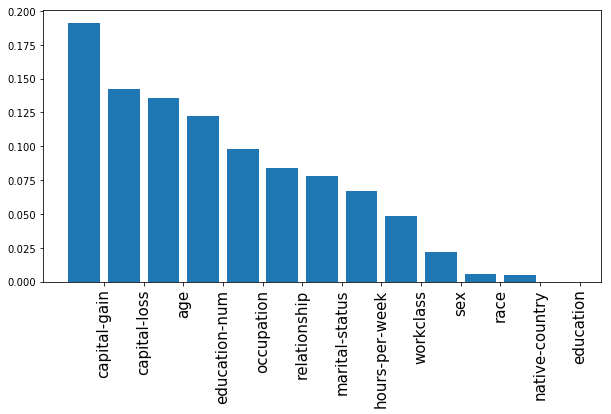

In [99]:
plt.figure(figsize=(10, 5))

ordering = np.argsort(clf.feature_importances_)[::-1]

importances = clf.feature_importances_[ordering]
feature_names = features.columns[ordering]

x = np.arange(len(feature_names))
plt.bar(x, importances)
plt.xticks(x + 0.5, feature_names, rotation=90, fontsize=15);

## Using the boosted trees to extract features for a Logistic Regression model

The following is an implementation of a trick found in:

Practical Lessons from Predicting Clicks on Ads at Facebook
Junfeng Pan, He Xinran, Ou Jin, Tianbing XU, Bo Liu, Tao Xu, Yanxin Shi, Antoine Atallah, Ralf Herbrich, Stuart Bowers, Joaquin Quiñonero Candela
International Workshop on Data Mining for Online Advertising (ADKDD)

https://www.facebook.com/publications/329190253909587/

In [100]:
from sklearn.base import BaseEstimator, TransformerMixin, clone
from sklearn.preprocessing import LabelBinarizer
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.pipeline import make_pipeline
from scipy.sparse import hstack


class TreeTransform(BaseEstimator, TransformerMixin):
    """One-hot encode samples with an ensemble of trees
    
    This transformer first fits an ensemble of trees (e.g. gradient
    boosted trees or a random forest) on the training set.

    Then each leaf of each tree in the ensembles is assigned a fixed
    arbitrary feature index in a new feature space. If you have 100
    trees in the ensemble and 2**3 leafs per tree, the new feature
    space has 100 * 2**3 == 800 dimensions.
    
    Each sample of the training set go through the decisions of each tree
    of the ensemble and ends up in one leaf per tree. The sample if encoded
    by setting features with those leafs to 1 and letting the other feature
    values to 0.
    
    The resulting transformer learn a supervised, sparse, high-dimensional
    categorical embedding of the data.
    
    This transformer is typically meant to be pipelined with a linear model
    such as logistic regression, linear support vector machines or
    elastic net regression.
    
    """

    def __init__(self, estimator):
        self.estimator = estimator
        
    def fit(self, X, y):
        self.fit_transform(X, y)
        return self
        
    def fit_transform(self, X, y):
        self.estimator_ = clone(self.estimator)
        self.estimator_.fit(X, y)
        self.binarizers_ = []
        sparse_applications = []
        estimators = np.asarray(self.estimator_.estimators_).ravel()
        for t in estimators:
            lb = LabelBinarizer(sparse_output=True)
            sparse_applications.append(lb.fit_transform(t.tree_.apply(X)))
            self.binarizers_.append(lb)
        return hstack(sparse_applications)
        
    def transform(self, X, y=None):
        sparse_applications = []
        estimators = np.asarray(self.estimator_.estimators_).ravel()
        for t, lb in zip(estimators, self.binarizers_):
            sparse_applications.append(lb.transform(t.tree_.apply(X)))
        return hstack(sparse_applications)


boosted_trees = GradientBoostingClassifier(
    max_leaf_nodes=5, learning_rate=0.1,
    n_estimators=100, random_state=0,
) 

pipeline = make_pipeline(
    TreeTransform(boosted_trees),
    LogisticRegression(C=1)
)

pipeline.fit(X_train, y_train);

In [101]:
y_pred_proba = pipeline.predict_proba(X_test)[:, 1]
print("ROC AUC: %0.4f" % roc_auc_score(y_test, y_pred_proba))

ROC AUC: 0.9244


In [102]:
y_pred = pipeline.predict(X_test)
print(classification_report(y_test, y_pred, target_names=target_names))

             precision    recall  f1-score   support

      <=50K       0.89      0.93      0.91      4918
       >50K       0.76      0.66      0.71      1595

avg / total       0.86      0.87      0.86      6513



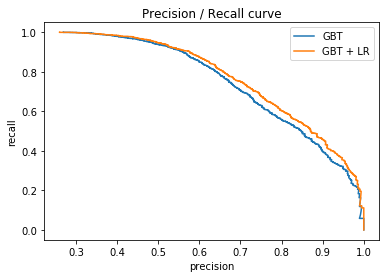

In [103]:
from sklearn.metrics import precision_recall_curve

precision_gb_lr, recall_gb_lr, _ = precision_recall_curve(
    y_test, y_pred_proba)

plt.plot(precision_gb, recall_gb, label='GBT')
plt.plot(precision_gb_lr, recall_gb_lr, label='GBT + LR')
plt.xlabel('precision')
plt.ylabel('recall')
plt.title('Precision / Recall curve')
plt.legend();